In [2]:
import os

# --- Add these lines at the very top of your script ---
# This must be done BEFORE importing numpy or other scientific libraries.
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'

import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import product
import time
from device import Device

from hamiltonian import Hamiltonian
from device import Device

import scipy as sp
from hamiltonian import Hamiltonian
from helper import Helper_functions
import scipy.sparse as spa
import numpy as np
import scipy.sparse as sp
from lead_self_energy import LeadSelfEnergy
from scipy.sparse import bmat, identity, random, csc_matrix
from scipy.sparse.linalg import eigsh, eigs, spsolve
import time
from charge import Charge

In [3]:
dev = Device(2e-9, 1e-9)
ham = Hamiltonian(dev)
charge = Charge(dev)


In [4]:
energy_range = np.linspace(-10, 10, 150)

LDOS = np.zeros((dev.nx, dev.nz))

for e in energy_range:
    L = charge.calculate_LDOS(e)
    D = charge.unsmear_to_smear(L)
    LDOS += D

Calculating LDOS at E=-10.000 eV
Calculating LDOS at E=-9.866 eV
Calculating LDOS at E=-9.732 eV
Calculating LDOS at E=-9.597 eV
Calculating LDOS at E=-9.463 eV
Calculating LDOS at E=-9.329 eV
Calculating LDOS at E=-9.195 eV
Calculating LDOS at E=-9.060 eV
Calculating LDOS at E=-8.926 eV
Calculating LDOS at E=-8.792 eV
Calculating LDOS at E=-8.658 eV
Calculating LDOS at E=-8.523 eV
Calculating LDOS at E=-8.389 eV
Calculating LDOS at E=-8.255 eV
Calculating LDOS at E=-8.121 eV
Calculating LDOS at E=-7.987 eV
Calculating LDOS at E=-7.852 eV
Calculating LDOS at E=-7.718 eV
Calculating LDOS at E=-7.584 eV
Calculating LDOS at E=-7.450 eV
Calculating LDOS at E=-7.315 eV
Calculating LDOS at E=-7.181 eV
Calculating LDOS at E=-7.047 eV
Calculating LDOS at E=-6.913 eV
Calculating LDOS at E=-6.779 eV
Calculating LDOS at E=-6.644 eV
Calculating LDOS at E=-6.510 eV
Calculating LDOS at E=-6.376 eV
Calculating LDOS at E=-6.242 eV
Calculating LDOS at E=-6.107 eV
Calculating LDOS at E=-5.973 eV
Calcula

Plotting array of shape (40, 50) over domain X=[0, 2e-09], Z=[0, 1e-09]


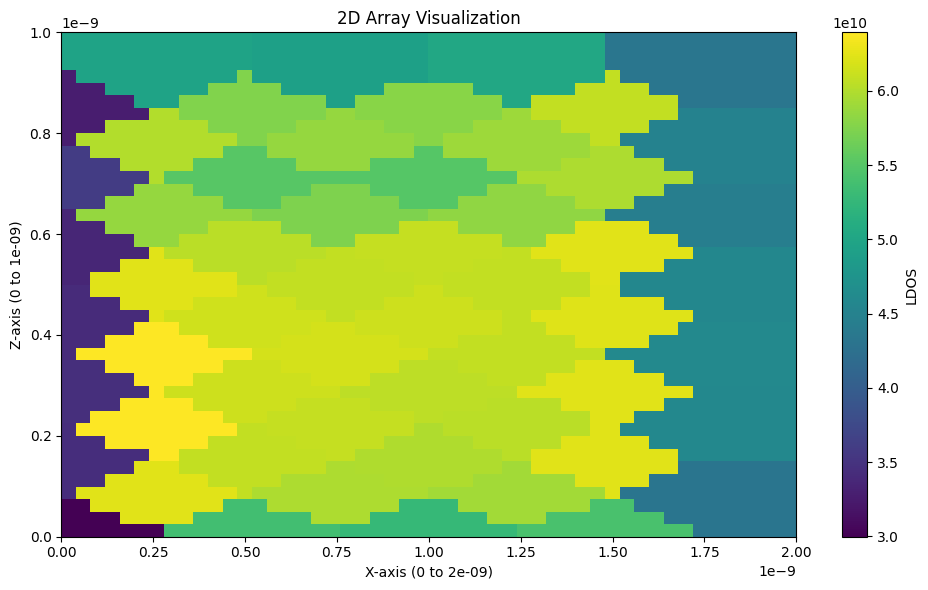

In [6]:
LDOS / 100
def plot_2d_array(data, Lx, Lz):

    if not isinstance(data, np.ndarray) or data.ndim != 2:
        raise ValueError("Input 'data' must be a 2D numpy array.")
    
    print(f"Plotting array of shape {data.shape} over domain X=[0, {Lx}], Z=[0, {Lz}]")
    plt.figure(figsize=(10, 6))

    im = plt.imshow(data, extent=[0, Lx, 0, Lz], origin='lower', aspect='auto', cmap='viridis')

    plt.colorbar(im, label='LDOS')

    plt.xlabel(f'X-axis (0 to {Lx})')
    plt.ylabel(f'Z-axis (0 to {Lz})')
    plt.title('2D Array Visualization')
    plt.tight_layout()

    plt.show()

plot_2d_array(LDOS, 2e-9, 1e-9)

In [11]:
LDOS[:,0]

array([2.99723235e+10, 2.99723235e+10, 2.99723235e+10, 3.43810529e+10,
       3.43810529e+10, 3.43810529e+10, 3.43810529e+10, 3.43810529e+10,
       3.43810529e+10, 3.45065510e+10, 3.45065510e+10, 3.45065510e+10,
       3.45065510e+10, 3.45065510e+10, 3.41092564e+10, 3.41092564e+10,
       3.41092564e+10, 3.41092564e+10, 3.41092564e+10, 3.41092564e+10,
       3.36661577e+10, 3.36661577e+10, 3.36661577e+10, 3.36661577e+10,
       3.36661577e+10, 3.36661577e+10, 3.60467408e+10, 3.60467408e+10,
       3.60467408e+10, 3.60467408e+10, 3.60467408e+10, 3.26312706e+10,
       3.26312706e+10, 3.26312706e+10, 3.26312706e+10, 3.26312706e+10,
       3.26312706e+10, 4.96168366e+10, 4.96168366e+10, 4.96168366e+10])

In [ ]:
charge._calculate_dos_point(-1,0)